# Consumer Complaint Resoultion Analysis

#### Reading the data

In [1]:
import pandas as pd
train = pd.read_csv(r'C:\\Users\\madhu\\OneDrive\\Desktop\\Edureka\\mini project 2\\Datasets\\Consumer_Complaints_train.csv')
test = pd.read_csv(r'C:\\Users\\madhu\\OneDrive\\Desktop\\Edureka\\mini project 2\\Datasets\\Consumer_Complaints_test.csv')

In [2]:
train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


### Checking the data types

In [3]:
print('Data types in train data')
print(train.dtypes)
print('   \n')
print('Data types in test data')
print(test.dtypes)

Data types in train data
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object
   

Data types in test data
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    obj

### Missing value analysis and dropping the columns with >25% missing values

In [4]:
s = train.isnull().sum()
Nulls = train.isnull().sum()>(train.shape[0]*.25)
Nulls = pd.DataFrame({'Features':Nulls.index, 'nulls':Nulls.values})
Drop = Nulls[Nulls.nulls == True]
Drop.Features

2                      Sub-product
4                        Sub-issue
5     Consumer complaint narrative
6          Company public response
10                            Tags
11      Consumer consent provided?
Name: Features, dtype: object

In [5]:
train_new = train.drop(columns =Drop.Features)

### Etracting the day, month and year column from Date column

In [6]:
Date_received = train_new['Date received'].str.split('-')
train_new['Day'] = Date_received.str[2]
train_new['Month'] = Date_received.str[1]
train_new['Year'] = Date_received.str[0]
train_new.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,04,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,03,03,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,01,2015


### Creating new column “Days held” for Number of Days the Complaint was with the Company

In [7]:
days_held = pd.to_datetime( train_new['Date sent to company']) -pd.to_datetime( train_new['Date received'])
train_new['Days held'] = days_held
train_new.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015,0 days
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,04,2015,0 days
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013,14 days
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,03,03,2016,1 days
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,01,2015,0 days


### Dropping "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"fields

In [8]:
train_new.drop(train_new.columns[[0,5,7,11]], axis=1, inplace=True)
train_new

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0 days
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,04,2015,0 days
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14 days
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,03,03,2016,1 days
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,01,2015,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,14,04,2014,-1 days
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,14,03,2013,4 days
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,01,02,2013,0 days
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,25,06,2015,4 days


### Imputing Nullvalue in “State”by Mode

In [9]:
train_new['State'] = train_new['State'].fillna(train_new['State'].mode().values[0])

### Storing data of disputed people into the “disputed_cons” variable

In [11]:
disputed_cons = train_new[train_new['Consumer disputed?'] == 'Yes']

### Bar graph of thetotal no of disputes of consumers

<AxesSubplot:xlabel='Consumer disputed?', ylabel='count'>

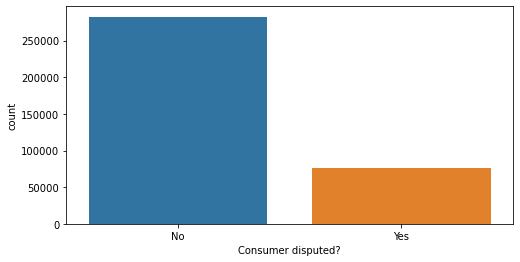

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8,4))
sns.countplot(train_new['Consumer disputed?'])

### Bar graph of thetotal no of disputes products-wise

<AxesSubplot:xlabel='Product', ylabel='count'>

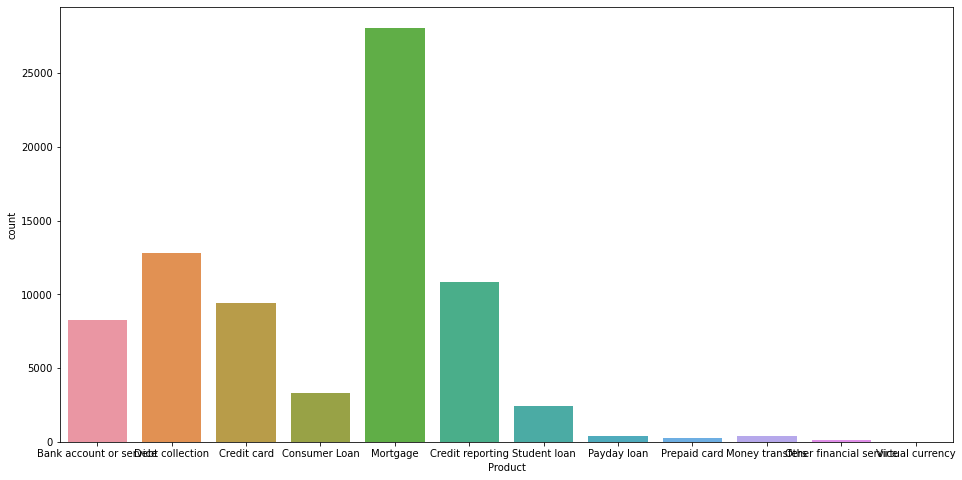

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(disputed_cons['Product'])

### Bar graph ofthe total no of disputes with Top Issues by Highest Disputes

<AxesSubplot:xlabel='Issue', ylabel='count'>

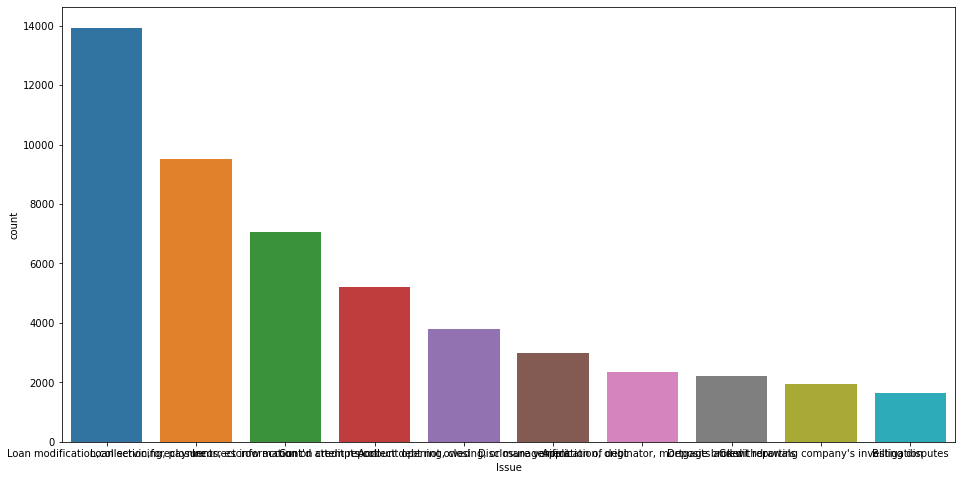

In [72]:
large_to_small = disputed_cons.groupby('Issue').size().sort_values().index[::-1][:10]
plt.figure(figsize=(16,8))
sns.countplot(disputed_cons['Issue'],order=large_to_small)

### Bar graph ofthe total no of disputes by State with Maximum Disputes

<AxesSubplot:xlabel='State', ylabel='count'>

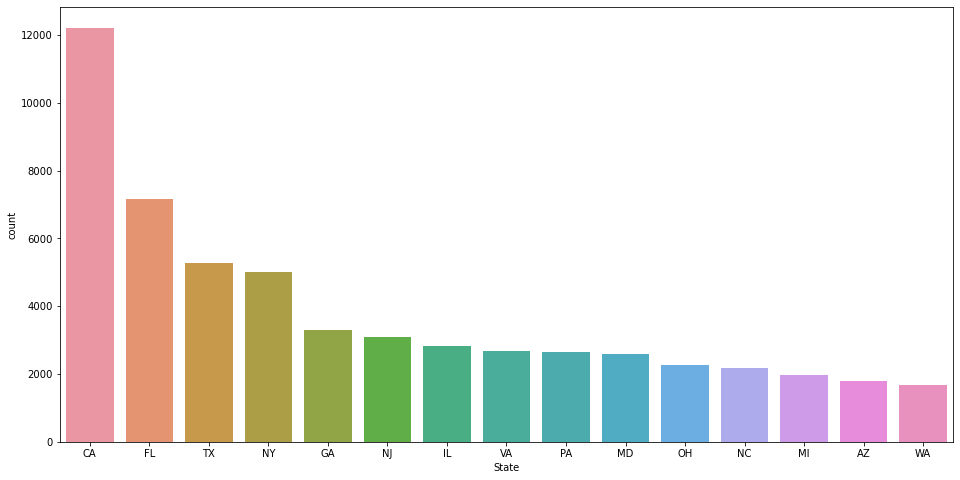

In [75]:
large_to_small = disputed_cons.groupby('State').size().sort_values().index[::-1][:15]
plt.figure(figsize=(16,8))
sns.countplot( disputed_cons['State'], order = large_to_small)

### Bar graph ofthe total no of disputes Submitted Via different source

<AxesSubplot:xlabel='Submitted via', ylabel='count'>

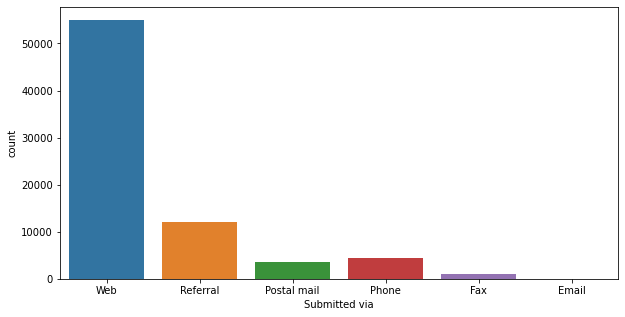

In [77]:
plt.figure(figsize=(10,5))
sns.countplot( disputed_cons['Submitted via'])

### Bar graph ofthe total no of disputes where the Company's Response to the Complaints

<AxesSubplot:xlabel='Company response to consumer', ylabel='count'>

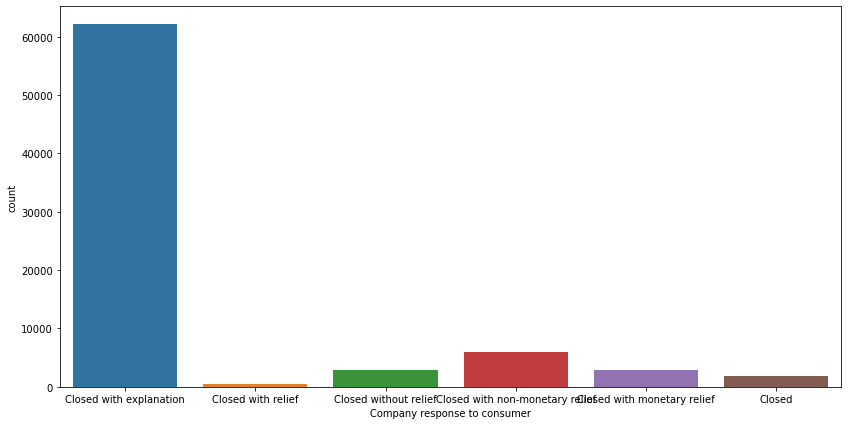

In [79]:
plt.figure(figsize=(14,7))
sns.countplot( disputed_cons['Company response to consumer'])

### Disputes Instead of Timely Response

<AxesSubplot:xlabel='Timely response?', ylabel='count'>

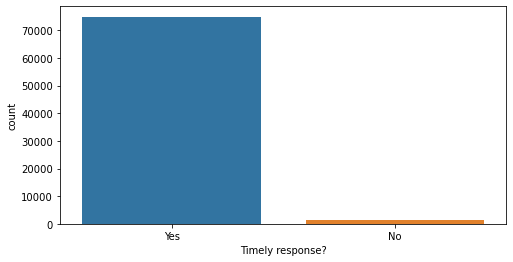

In [81]:
plt.figure(figsize=(8,4))
sns.countplot( disputed_cons['Timely response?'])

### Bar graph ofthe total no of disputes over Year Wise Complaints

<AxesSubplot:xlabel='Year', ylabel='count'>

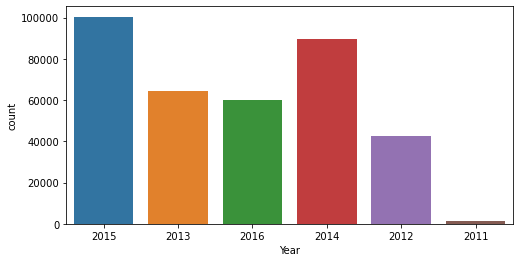

In [83]:
plt.figure(figsize=(8,4))
sns.countplot( train_new['Year'])

### Bar graph ofthe total no of disputes over Year Wise Disputes

<AxesSubplot:xlabel='Year', ylabel='count'>

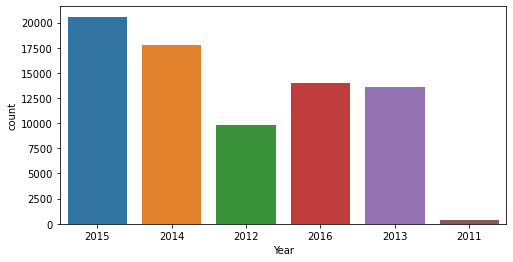

In [84]:
plt.figure(figsize=(8,4))
sns.countplot( disputed_cons['Year'])

### Bar graph of Top Companies with Highest Complaints

<AxesSubplot:xlabel='Company', ylabel='count'>

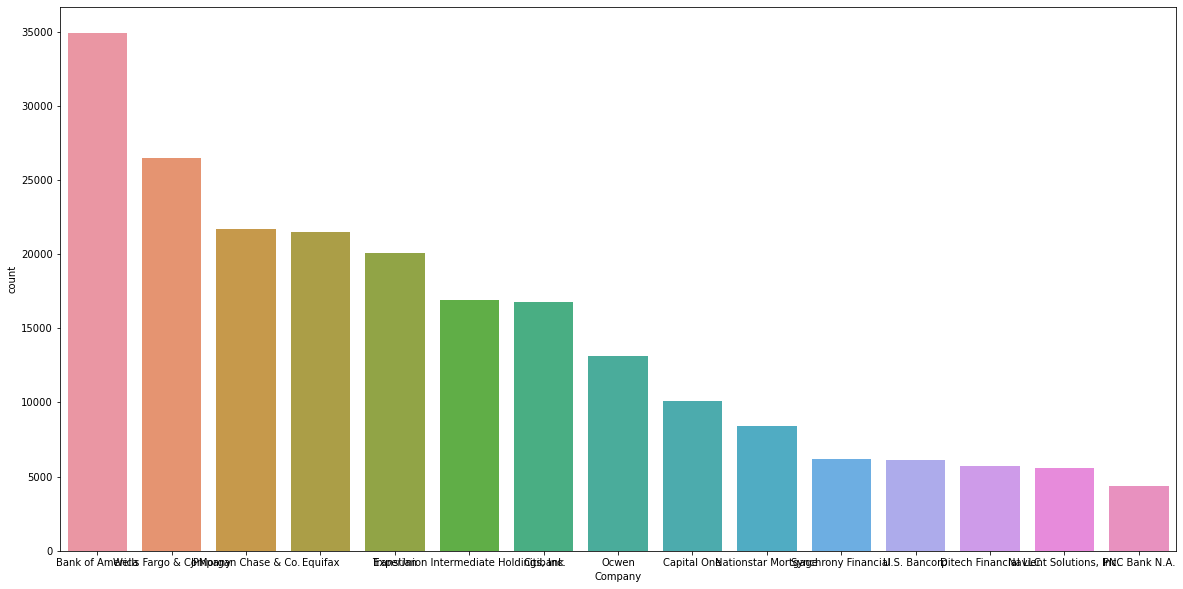

In [92]:
large_to_small = train_new.groupby('Company').size().sort_values().index[::-1][:15]
plt.figure(figsize=(20,10))
sns.countplot( train_new['Company'], order = large_to_small)

### Converting all negative days held to zero

In [2]:
train_new[train_new['Days held']<0] = 0

### Dropping Unnecessary Columns for the Model Building like:'Company', 'State', 'Year_Received', 'Days_held'

In [3]:
train_new.drop(train_new.columns[[3,4,11,12]], axis=1, inplace=True)
train_new

,Unnamed: 0,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month
0,0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,0,14,10
1,1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,1,26,4
2,2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,0,20,12
3,3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,0,3,3
4,4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1,30,1
...,...,...,...,...,...,...,...,...,...
358805,0,0,0,0,0,0,0,0,0
358806,358806,Mortgage,"Loan modification,collection,foreclosure",Referral,Closed with non-monetary relief,Yes,0,14,3
358807,358807,Credit card,Payoff process,Web,Closed,Yes,1,1,2
358808,358808,Debt collection,Cont'd attempts collect debt not owed,Phone,Closed with non-monetary relief,Yes,0,25,6


### Creating Dummy Variables for categorical features

In [5]:
train_new = pd.get_dummies(train_new)
train_new

,Consumer disputed?,Day,Month,Product_0,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Company response to consumer_0,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_0,Timely response?_No,Timely response?_Yes
0,0,14,10,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,26,4,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,20,12,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,3,3,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,1,30,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
358806,0,14,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
358807,1,1,2,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
358808,0,25,6,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
X = train_new.drop(train_new.columns[[5]], axis=1)
y = train_new['Consumer disputed?']

### Scaling the Data Sets

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(X)
X_scaled = model.transform(X)

### Making feature Selection with the help of PCA up to 80% of the information

In [8]:
from sklearn.decomposition import PCA
pca = PCA(0.80)
X_pca = pca.fit_transform(X_scaled)

### Splittingthe Data Sets Into X and Y by the dependent and independent variables

In [9]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X_pca, y, test_size = 0.2, random_state = 30)

### Logistic Regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt


#Logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
Accuracy_Logistic = accuracy_score(y_test, y_pred)

print ("Accuracy_Logistic_Regression : ", round(Accuracy_Logistic,2))


Accuracy_Logistic_Regression :  0.97


### Decision Tree Classifier

In [14]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
dtc.fit(X_train, y_train)

y_predi = dtc.predict(X_test)
Accuracy_dtc = accuracy_score(y_test,y_predi)

print ("Accuracy_DecisionTree        : ", round(Accuracy_dtc,2))

Accuracy_DecisionTree        :  0.9


### Random Forest Classifier

In [ ]:
#random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 50)
clf.fit(X_train,y_train)

y_predict = clf.predict(X_test)

Accuracy_RFC = accuracy_score(y_test,y_predict)

print ("Accuracy_RandomForest        : ", round(Accuracy_RFC,2))

### K Nearest Neigbors

In [ ]:
#KNearest Neigbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_preds = knn.predict(X_test)

Accuracy_knn = accuracy_score(y_test,y_preds)


print ("Accuracy_KNearestNeigbor     : ", round(Accuracy_knn,2))

### Adaboost Classifier

In [45]:
# Adaboost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model1 = abc.fit(X_train, y_train)

y_pred = model1.predict(X_test)
print("Accuracy score for Adaboost Boosting Cassifier: " , accuracy_score(y_test, y_pred))

Accuracy score for Adaboost Boosting Cassifier:  0.9764638666703827


### Gradient Boosting Classifier

In [36]:
# Gradient Boosting Classifier


from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
print("Accuracy score for Gradient Boosting Cassifier: " , gb_clf.score(X_test, y_test))

Accuracy score for Gradient Boosting Cassifier:  0.9302973718681197


In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### XGB classifier

In [43]:
# XGB classifier

from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)


score = xgb_clf.score(X_test, y_test)
print("Accuracy score for XGB Cassifier: " , xgb_clf.score(X_test, y_test))

Accuracy score for XGB Cassifier:  0.9996237563055657


## XGB Classifier is having the highest accuracy (0.99) among all the Classifiers